this is the 2nd part of prec_huc2_cesm_livneh_paper.ipynb
Kernel casper_2020

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import mapclassify as mc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil
import matplotlib.ticker as mticker
#from matplotlib import ticker, cm
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatter 
import matplotlib.colors as mcolors
%matplotlib inline
from scipy.stats import pearsonr 

#GeoCAT Specific packages
from geocat.viz import util as gvutil
import geocat.datafiles as gdf
from IPython.display import IFrame
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import geoplot as gplt
import geopandas as gpd
import mapclassify as m
#from psif_func import plot_seasonal_4
from importlib import reload
import psif_func
import config

reload(psif_func)
 
from psif_func import plot_diff_3
from psif_func import plot_seasonal
from psif_func import plot_seasonal_12
from psif_func import plot_mpas_diff_3
from psif_func import plot_box_shp_3
from psif_func import plot_ts_shp_2
from psif_func import ax_coastlines_country
from psif_func import plot_ts_shp_seasonal_trend
from psif_func import seasonal_mean2total_3d
from psif_func import seasonal_mean2total_4d
from psif_func import plot_seasonal_trend_HUC2
from psif_func import plot_seasonal_trend_HUC2_12
from psif_func import cal_trend_huc2_1d
from psif_func import plot_trend_HUC2

In [2]:
# DJF, MAM, JJA, SON
nday_season = [90,92,92,91]
n_season = len(nday_season)
n_shp = 18

year_s = 1981
year_e = 2010
n_year = 30
year_fs = 2041
year_fe = 2070

# coordinates
year_h = range(year_s, year_e+1, 1)
year_f = range(year_fs, year_fe+1, 1)

In [3]:
dir_plot = '/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/'
dir_cesm = '/glade/campaign/mmm/c3we/mingge/CESM/'
dir_liv  = '/glade/campaign/mmm/c3we/mingge/LIVNEH/'

In [4]:
flnm_mean_liv      = 'prec_mean_1981-2010_livneh_wy.nc'
flnm_prec_shp_liv  = 'prec_1981-2010_livneh_shp_wy.nc'
flnm_p95_liv = "p95_LIVNEH_1981-2010_wy.nc"

In [5]:
## CESM
flnm_cesm = 'prec_1981-2010_CESM_LivnehGrid_wy.nc'
flnm_cesm_f = 'prec_2041-2070_CESM_LivnehGrid_wy.nc'
flnm_shp_cesm = 'prec_1981-2010_cesm_shp_wy.nc'
flnm_shp_cesm_f = 'prec_2041-2070_cesm_shp_wy.nc'
#flnm_f = 'prec_mean_2041-2070_CONUS_wy.nc'
#flnm_h = 'prec_mean_1981-2010_CONUS_wy.nc'
flnm_cesm_add = 'prec_mean_1981-2010_additional_CONUS_wy.nc'

In [6]:
flnm_cdd_liv = "cdd_LIVNEH_1981-2010_wy.nc"
flnm_cwd_liv = "cwd_LIVNEH_1981-2010_wy.nc"
flnm_cdd_annual_liv = "cdd_LIVNEH_1981-2010_annual_wy.nc"
flnm_cwd_annual_liv = "cwd_LIVNEH_1981-2010_annual_wy.nc"

#### Supplemental figure mean longest dry spell CDD (MRT)

/glade/campaign/mmm/c3we/mingge/LIVNEH/cdd_LIVNEH_1981-2010_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_CESM_LivnehGrid_wy.nc


<Figure size 1152x768 with 0 Axes>

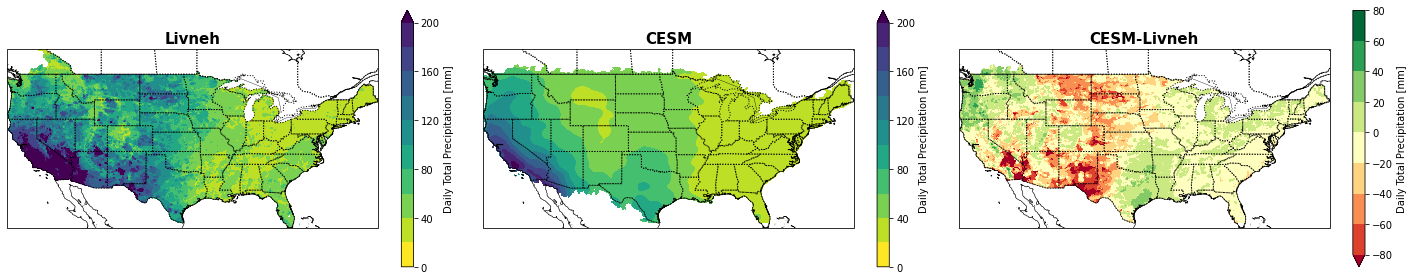

In [7]:
with xr.open_dataset(dir_liv + flnm_cdd_liv) as ds_mean_liv:
  print(dir_liv + flnm_cdd_liv)  

with xr.open_dataset(dir_cesm + flnm_cesm) as ds_prec_cesm:
  print(dir_cesm + flnm_cesm)

cdd_liv  = ds_mean_liv.cdd_2d
cdd_cesm = ds_prec_cesm.cdd_liv_3d.mean(dim=('member'))
cdd_dif  = cdd_cesm - cdd_liv 

data_3d = xr.concat([cdd_liv, cdd_cesm, cdd_dif] , "new_dim")
title_s = ['Livneh', 'CESM', 'CESM-Livneh']

cnlevel_0   = np.linspace(0, 200, num=11)
cnlevel_dif = np.linspace(-80, 80, num=9)

fig = plt.figure(figsize=(12,8), dpi=96) 
plot_mpas_diff_3(data_3d, title_s, cnlevel_0, cnlevel_dif);

plt.savefig(dir_plot + "cdd_cesm_cli.png", bbox_inches='tight');

#### Supplemental figure mean longest wet spell CWD (MRT)

/glade/campaign/mmm/c3we/mingge/LIVNEH/cwd_LIVNEH_1981-2010_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_CESM_LivnehGrid_wy.nc


<Figure size 1152x768 with 0 Axes>

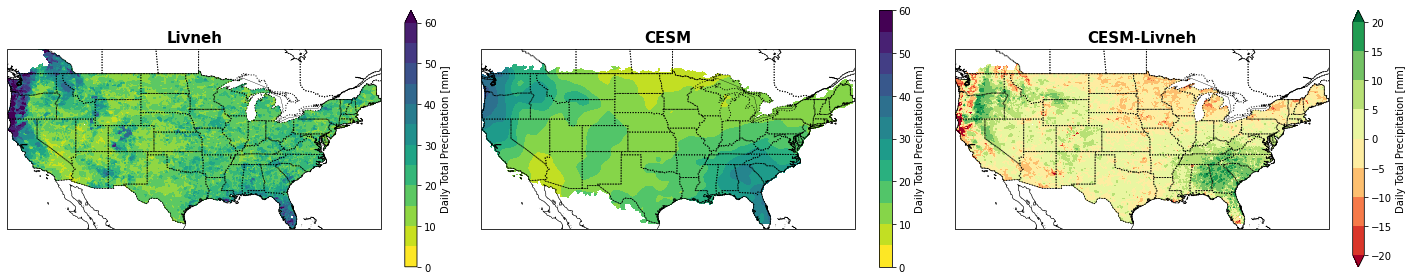

In [8]:
with xr.open_dataset(dir_liv + flnm_cwd_liv) as ds_mean_liv:
  print(dir_liv + flnm_cwd_liv)  

with xr.open_dataset(dir_cesm + flnm_cesm) as ds_prec_cesm:
  print(dir_cesm + flnm_cesm)


cwd_liv  = ds_mean_liv.cwd_2d
cwd_cesm = ds_prec_cesm.cwd_liv_3d.mean(dim=('member'))
cwd_dif  = cwd_cesm - cwd_liv 

data_3d = xr.concat([cwd_liv, cwd_cesm, cwd_dif] , "new_dim")
title_s = ['Livneh', 'CESM', 'CESM-Livneh']

cnlevel_0   = np.linspace(0, 60, num=13)
cnlevel_dif = np.linspace(-20, 20, num=9)

fig = plt.figure(figsize=(12,8), dpi=96) 
plot_mpas_diff_3(data_3d, title_s, cnlevel_0, cnlevel_dif);

plt.savefig(dir_plot + "cwd_cesm_cli.png", bbox_inches='tight');

#### Supplemental figure time series plot CDD per year per HUC2 basin 

/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_1981-2010_livneh_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ cdd_cesm_livneh_annual_ts_huc2.png


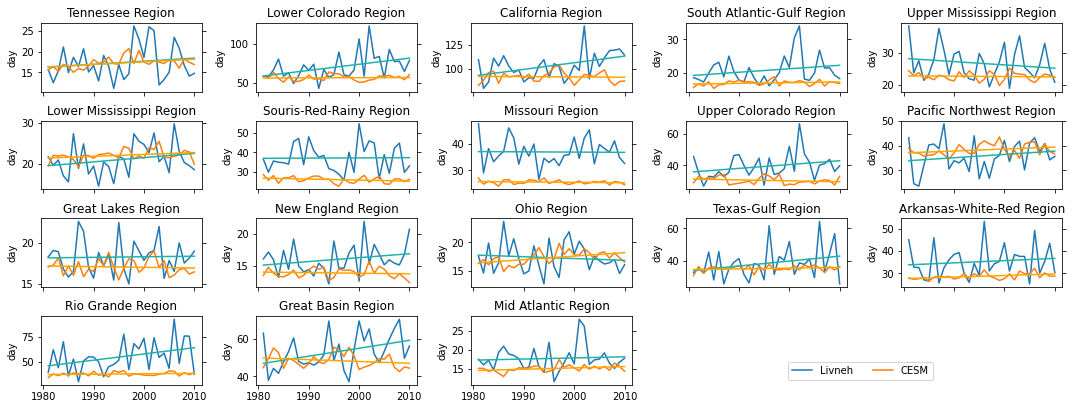

In [22]:
with xr.open_dataset(dir_liv + flnm_prec_shp_liv) as ds_prec_shp_liv:
  print(dir_liv + flnm_prec_shp_liv) 

with xr.open_dataset(dir_cesm + flnm_shp_cesm) as ds_prec_shp_cesm:
  print(dir_cesm + flnm_shp_cesm) 

cdd_year_liv  = ds_prec_shp_liv.cdd_year_3d
cdd_year_cesm = ds_prec_shp_cesm.cdd_year_4d.mean(dim='member').transpose('year','shapefile_area')

# coordinates
year = range(1981,2011, 1)
models = range(1, 3, 1)

labels=['Livneh','CESM']
# concatenate xarray along a dimension 'none' and then change it to  'model'
da_3d = xr.concat([cdd_year_liv, cdd_year_cesm], "none")

# add coordinates and dimension rename
da_3d=xr.DataArray(da_3d, coords=[range(year_s, year_e+1,1), range(1,19,1), models], dims=["year", "huc2", "models"])

plot_ts_shp_2(da_3d, labels, 'year', 'day')

plt.savefig(dir_plot + "cdd_cesm_livneh_annual_ts_huc2.png")
print(dir_plot, "cdd_cesm_livneh_annual_ts_huc2.png")

#### Supplemental figure time series plot CWD per year per HUC2 basin 

/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_1981-2010_livneh_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ cwd_cesm_livneh_annual_ts_huc2.png


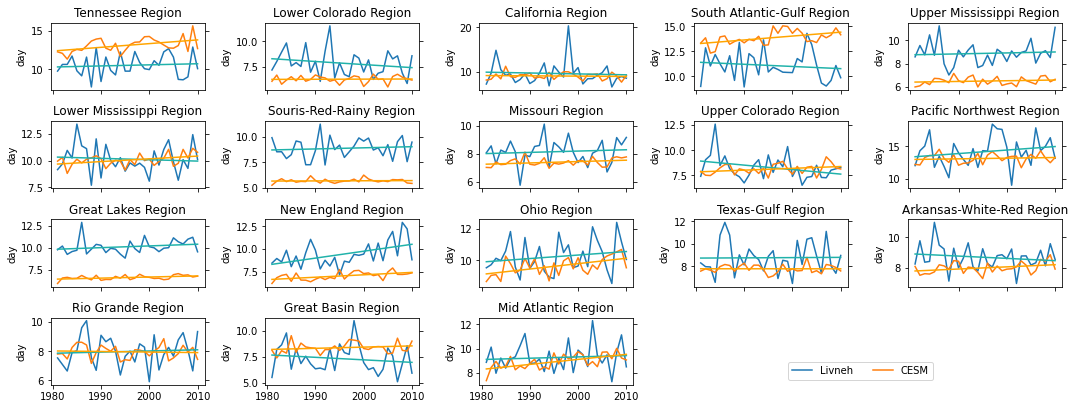

In [21]:
with xr.open_dataset(dir_liv + flnm_prec_shp_liv) as ds_prec_shp_liv:
  print(dir_liv + flnm_prec_shp_liv) 

with xr.open_dataset(dir_cesm + flnm_shp_cesm) as ds_prec_shp_cesm:
  print(dir_cesm + flnm_shp_cesm) 

cwd_year_liv  = ds_prec_shp_liv.cwd_year_3d
cwd_year_cesm = ds_prec_shp_cesm.cwd_year_4d.mean(dim='member').transpose('year','shapefile_area')

# coordinates
year = range(1981,2011, 1)
models = range(1, 3, 1)

labels=['Livneh','CESM']
# concatenate xarray along a dimension 'none' and then change it to  'model'
da_3d = xr.concat([cwd_year_liv, cwd_year_cesm], "none")

# add coordinates and dimension rename
da_3d=xr.DataArray(da_3d, coords=[range(year_s, year_e+1,1), range(1,19,1), models], dims=["year", "huc2", "models"])

plot_ts_shp_2(da_3d, labels, 'year', 'day')

plt.savefig(dir_plot + "cwd_cesm_livneh_annual_ts_huc2.png")
print(dir_plot, "cwd_cesm_livneh_annual_ts_huc2.png")

#### Seasonal N95 in observations, CESM2 and difference spatially 
days in 30-year

/glade/campaign/mmm/c3we/mingge/LIVNEH/p95_LIVNEH_1981-2010_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_CESM_LivnehGrid_wy.nc


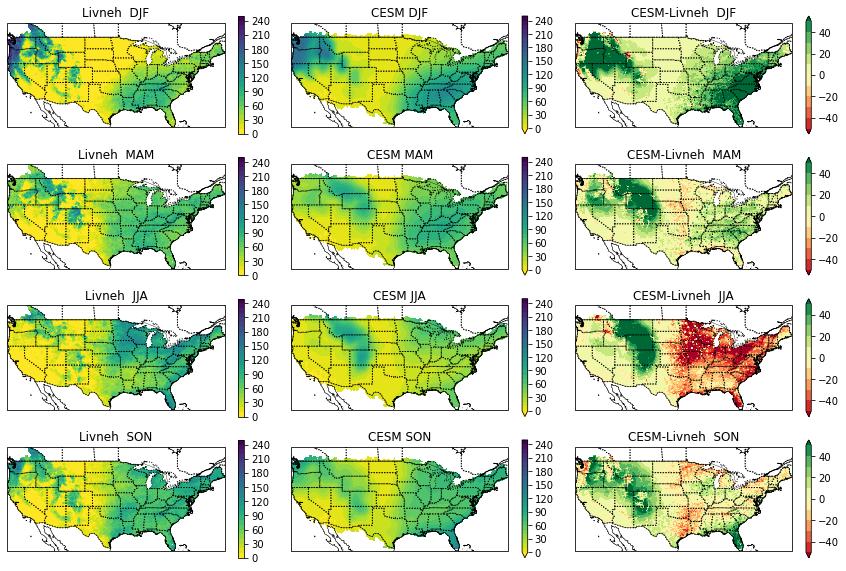

In [11]:
with xr.open_dataset(dir_liv + flnm_p95_liv ) as ds_p95_liv:
  print(dir_liv + flnm_p95_liv) 

with xr.open_dataset(dir_cesm + flnm_cesm) as ds_p95_cesm:
  print(dir_cesm + flnm_cesm) 

n95_season_liv  = ds_p95_liv.n95_season_3d
n95_season_cesm = ds_p95_cesm.n95_season_4d.mean(dim='member')
n95_season_dif = n95_season_cesm - n95_season_liv

data_4d = xr.concat([n95_season_liv, n95_season_cesm, n95_season_dif] , "new_dim")
 
cnlevel_0 = np.linspace(0, 250, num=26)
cnlevel_dif = np.linspace(-50, 50, num=11)

plot_seasonal_12(data_4d, cnlevel_0, cnlevel_dif)

plt.savefig(dir_plot + "n95_cesm_livneh_seasonal.png", bbox_inches='tight', dpi=100)

#### Change in mean seasonal N95 2040-2070 relative to 1981-2010 (MRT)


/glade/campaign/mmm/c3we/mingge/CESM/prec_2041-2070_CESM_LivnehGrid_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_CESM_LivnehGrid_wy.nc


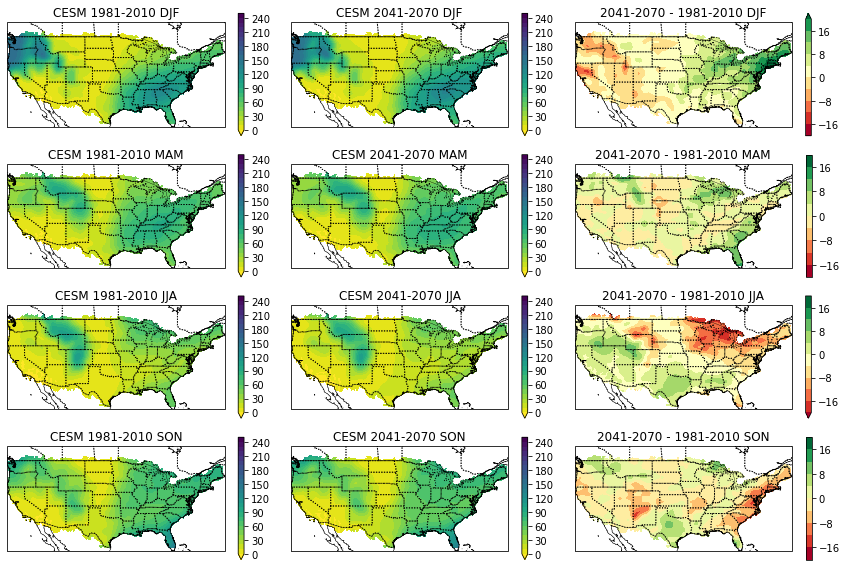

In [12]:
reload(psif_func)
from psif_func import plot_seasonal_12

with xr.open_dataset(dir_cesm + flnm_cesm_f) as ds_p95_cesm_f:
  print(dir_cesm + flnm_cesm_f) 

with xr.open_dataset(dir_cesm + flnm_cesm) as ds_p95_cesm:
  print(dir_cesm + flnm_cesm) 

n95_season_cesm   = ds_p95_cesm.n95_season_4d.mean(dim='member')
n95_season_cesm_f = ds_p95_cesm_f.n95_season_4d.mean(dim='member')
n95_season_dif    = n95_season_cesm_f - n95_season_cesm

data_4d = xr.concat([n95_season_cesm, n95_season_cesm_f, n95_season_dif] , "new_dim")
 
cnlevel_0 = np.linspace(0, 250, num=26)
cnlevel_dif = np.linspace(-20, 20, num=11)

plot_seasonal_12(data_4d, cnlevel_0, cnlevel_dif,  ['CESM 1981-2010', 'CESM 2041-2070', '2041-2070 - 1981-2010'])

plt.savefig(dir_plot + "n95_cesm_livneh_seasonal.png", bbox_inches='tight', dpi=100)

#### Proportional contribution of P95 to the annual total spatially P95Tot ????
I did average here (a lot of missing value for annual P95, I drop Nan)
It's extremely slow to to 30-year p95Tot, and I didn't do it. 

/glade/campaign/mmm/c3we/mingge/LIVNEH/p95_LIVNEH_1981-2010_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_CESM_LivnehGrid_wy.nc
plotting


<Figure size 1152x768 with 0 Axes>

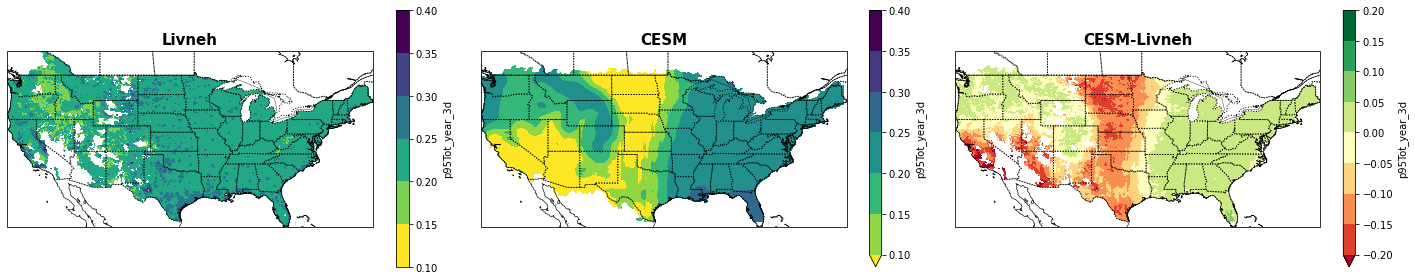

In [13]:
with xr.open_dataset(dir_liv + flnm_p95_liv) as ds_p95_liv:
  print(dir_liv + flnm_p95_liv)  

with xr.open_dataset(dir_cesm + flnm_cesm ) as ds_p95_cesm:
  print(dir_cesm + flnm_cesm)

p95Tot_liv  = ds_p95_liv.p95Tot_year_3d.mean(dim=('year'),skipna=True)
p95Tot_cesm = ds_p95_cesm.p95Tot_year_4d.mean(dim=('member', 'year'),skipna=True)
p95Tot_dif  = p95Tot_cesm - p95Tot_liv 

data_3d = xr.concat([p95Tot_liv, p95Tot_cesm, p95Tot_dif] , "new_dim")
title_s = ['Livneh', 'CESM', 'CESM-Livneh']

cnlevel_0   = np.linspace(0.1, 0.4, num=7)
cnlevel_dif = np.linspace(-0.2, 0.2, num=9)

print('plotting')
fig = plt.figure(figsize=(12,8), dpi=96) 
plot_mpas_diff_3(data_3d, title_s, cnlevel_0, cnlevel_dif);

plt.savefig(dir_plot + "p95Tot_liv_cesm_cli.png", bbox_inches='tight');

#### Monthly P95Tot in each HUC region 

/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_1981-2010_livneh_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ p95Tot_cesm_livneh_month_ts_huc2.png


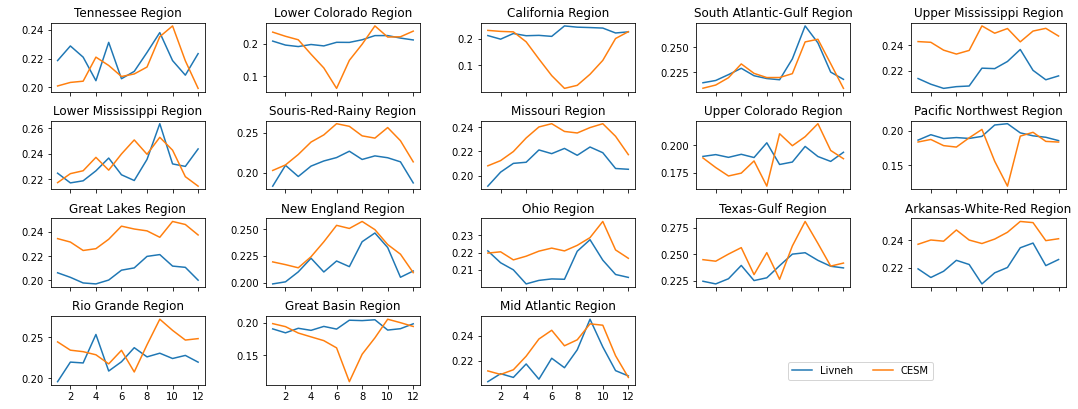

In [14]:
with xr.open_dataset(dir_liv + flnm_prec_shp_liv) as ds_p95_shp_liv:
  print(dir_liv + flnm_prec_shp_liv)  

with xr.open_dataset(dir_cesm + flnm_shp_cesm ) as ds_p95_shp_cesm:
  print(dir_cesm + flnm_shp_cesm)

p95Tot_month_liv  = ds_p95_shp_liv.p95Tot_month_3d
p95Tot_month_cesm = ds_p95_shp_cesm.p95Tot_month_4d.mean(dim=('member'))


# coordinates
month = range(1, 13, 1)
models = range(1, 3, 1)

labels=['Livneh','CESM']
# concatenate xarray along a dimension 'none' and then change it to  'model'
da_3d = xr.concat([p95Tot_month_liv, p95Tot_month_cesm], "none")

# add coordinates and dimension rename
da_3d=xr.DataArray(da_3d, coords=[month, range(1,19,1), models], dims=["month", "huc2", "models"])

plot_ts_shp_2(da_3d, labels, 'month', ' ')

plt.savefig(dir_plot + "cwd_cesm_livneh_annual_ts_huc2.png")
print(dir_plot, "p95Tot_cesm_livneh_month_ts_huc2.png")

#### Percentage change in P95tot in each HUC region 1981-2010 ????
trend is from first degree polynomial of linear regression over 30 year
-> changes over 30 years (1981-2010)

/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_1981-2010_livneh_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc


/glade/u/home/mingge/PSIF/psif_func.py:114: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ p95Tot_livneh_annual_huc2_map.png


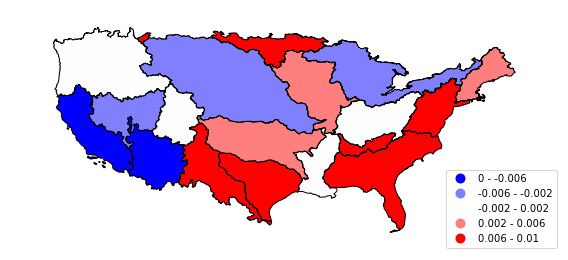

In [18]:
with xr.open_dataset(dir_liv + flnm_prec_shp_liv ) as ds_prec_shp_liv:
  print(dir_liv + flnm_prec_shp_liv)

with xr.open_dataset(dir_cesm + flnm_shp_cesm ) as ds_p95_shp_cesm:
  print(dir_cesm + flnm_shp_cesm)

p95Tot_year_liv  = ds_prec_shp_liv.p95Tot_year_3d.squeeze(drop=True) # (year: 30, shapefile_area: 18)
p95Tot_year_cesm = ds_p95_shp_cesm.p95Tot_year_4d.mean(dim='member').transpose('year','shapefile_area') 

# cal_trend_huc2_1d(arr_2d(year, n_shp))
trend_1d = cal_trend_huc2_1d(p95Tot_year_liv)*n_year

plot_trend_HUC2(trend_1d,  -0.01, 0.01, 'bwr')   
plt.savefig(dir_plot + "p95Tot_livneh_annual_huc2_map.png")
print(dir_plot, "p95Tot_livneh_annual_huc2_map.png")

/glade/u/home/mingge/PSIF/psif_func.py:114: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ p95Tot_cesm_annual_huc2_map.png


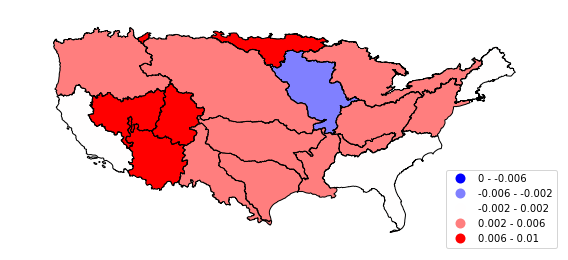

In [19]:
trend_1d = cal_trend_huc2_1d(p95Tot_year_cesm)*n_year

plot_trend_HUC2(trend_1d,  -0.01, 0.01, 'bwr')   
plt.savefig(dir_plot + "p95Tot_cesm_annual_huc2_map.png")
print(dir_plot, "p95Tot_cesm_annual_huc2_map.png")

#### Percent change in P95tot in each HUC region 2040-2070 relative to 1981-2010


/glade/campaign/mmm/c3we/mingge/CESM/prec_2041-2070_cesm_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc


/glade/u/home/mingge/PSIF/psif_func.py:114: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ p95Tot_cesm_dif_annual_huc2_map.png


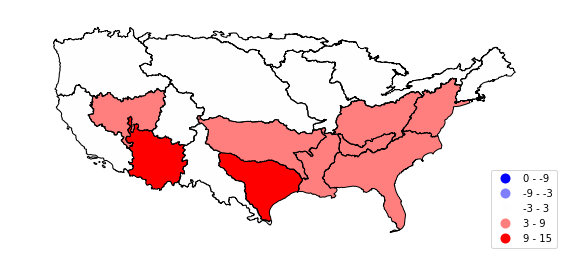

In [17]:
with xr.open_dataset(dir_cesm + flnm_shp_cesm_f) as ds_p95_shp_cesm_f:
  print(dir_cesm + flnm_shp_cesm_f)

with xr.open_dataset(dir_cesm + flnm_shp_cesm ) as ds_p95_shp_cesm:
  print(dir_cesm + flnm_shp_cesm)

p95Tot_year_cesm   = ds_p95_shp_cesm.p95Tot_year_4d.mean(dim=('member','year')) 
p95Tot_year_cesm_f = ds_p95_shp_cesm_f.p95Tot_year_4d.mean(dim=('member','year')) 

trend_1d = (p95Tot_year_cesm_f - p95Tot_year_cesm)/p95Tot_year_cesm*100.

plot_trend_HUC2(trend_1d,  -15, 15, 'bwr')   
plt.savefig(dir_plot + "p95Tot_cesm_dif_annual_huc2_map.png")
print(dir_plot, "p95Tot_cesm_dif_annual_huc2_map.png")